# Introductin
Name | Abid Ilmun Fisabil

Batch | FTDS-006

Phase | 1

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Following is the Data Dictionary for Credit Card dataset :-**

CUSTID : Identification of Credit Card holder (Categorical)<br>
BALANCE : Balance amount left in their account to make purchases <br>
BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)<br>
PURCHASES : Amount of purchases made from account<br>
ONEOFFPURCHASES : Maximum purchase amount done in one-go<br>
INSTALLMENTSPURCHASES : Amount of purchase done in installment<br>
CASHADVANCE : Cash in advance given by the user<br>
PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)<br>
ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)<br>
PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)<br>
CASHADVANCEFREQUENCY : How frequently the cash in advance being paid<br>
CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"<br>
PURCHASESTRX : Numbe of purchase transactions made<br>
CREDITLIMIT : Limit of Credit Card for user<br>
PAYMENTS : Amount of Payment done by user<br>
MINIMUM_PAYMENTS : Minimum amount of payments made by user<br>
PRCFULLPAYMENT : Percent of full payment paid by user<br>
TENURE : Tenure of credit card service for user<br>

**source**

https://www.kaggle.com/arjunbhasin2013/ccdata

# Importing Packages

In [70]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler,PowerTransformer
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import warnings
from sklearn.decomposition import PCA

# Data Loading

In [71]:
df = pd.read_csv('../input/ccdata/CC GENERAL.csv')

# Attribute Inspection

In [72]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [74]:
df.shape

(8950, 18)

In [75]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [76]:
df.duplicated().sum()

0

data consist of 8950 observations with 18 columns, 313 missing values, and no duplicates

In [77]:
obj_cols = ['BALANCE_FREQUENCY','PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY']
num_cols = [col for col in df.columns if col not in obj_cols][1:]

# EDA

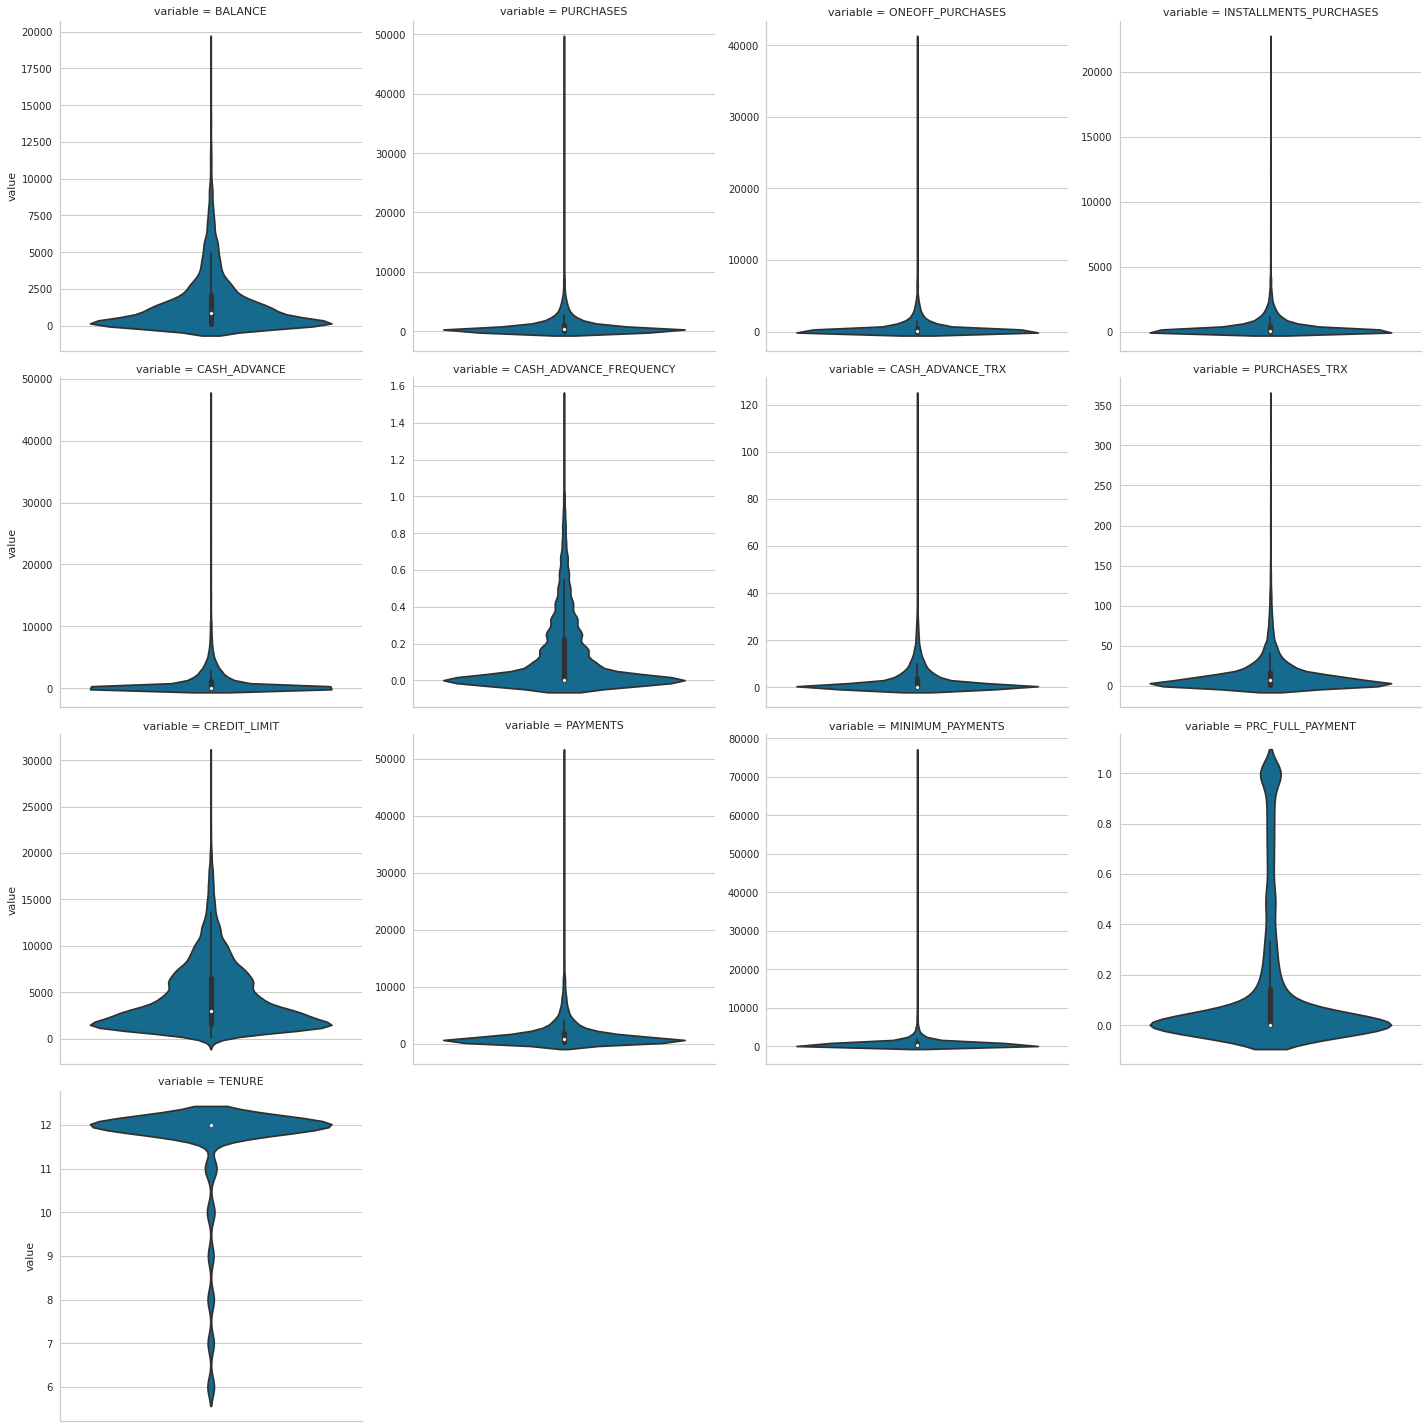

In [79]:
sns.catplot(data = pd.melt(df,value_vars = num_cols),
            kind = 'violin',
            y = 'value',
            col = 'variable',
            sharey = False,
            col_wrap = 4
           )

as we can see. almost all numerical features are severly skewed. outliers will likely be present in this dataset. 

even so, for this particular clustering analysis. we won't be dropping outliers. because that might be a cluster of its own and could be meaningful information

Text(0, 0.5, 'PURCHASES')

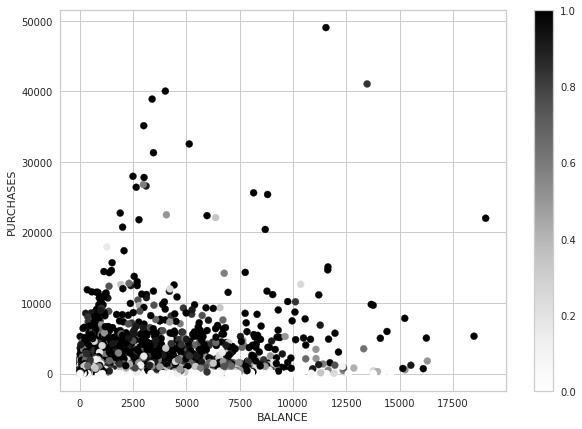

In [80]:
plt.figure(figsize = (10,7))
plt.scatter(data = df, x = 'BALANCE',y = 'PURCHASES',c = 'PURCHASES_FREQUENCY')
plt.colorbar()
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

there is a cluster where even if they have much in their credit balance, they are not frequently purchasing. we can assume that they are credit card holder

there are few people whose credit balance lesser than the first cluster but are frequent buyer

mostly, frequent buyers whose credit balance less than 7500 purchased 400-10000. some of these buyers even purchased with highest amount

Text(0, 0.5, 'PURCHASES')

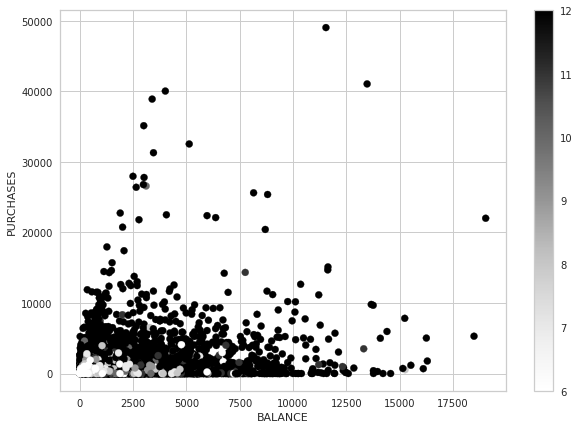

In [81]:
plt.figure(figsize = (10,7))
plt.scatter(data = df, x = 'BALANCE',y = 'PURCHASES',c = 'TENURE')
plt.colorbar()
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

many credit card holders have long tenure around 11 or 12. if we only regard credit card holders from this cluster and remove the rest. we are seeing that while the balance is less than 5000, they will continuou to purchase. if it goes pass 5000, their purchase amount will eventually decreasing

holders whose tenure less than 8 are spending the least amount of purchase 

In [82]:
input_df = df[df.columns[1:]].dropna()
input_df_2 = input_df.copy()

In [83]:
input_df[num_cols].skew()

BALANCE                    2.374254
PURCHASES                  8.055789
ONEOFF_PURCHASES           9.935776
INSTALLMENTS_PURCHASES     7.216133
CASH_ADVANCE               5.139629
CASH_ADVANCE_FREQUENCY     1.795915
CASH_ADVANCE_TRX           5.673327
PURCHASES_TRX              4.578418
CREDIT_LIMIT               1.507019
PAYMENTS                   5.873049
MINIMUM_PAYMENTS          13.622193
PRC_FULL_PAYMENT           1.886027
TENURE                    -3.011141
dtype: float64

In [84]:
trans = PowerTransformer('yeo-johnson')
input_df_2[num_cols] = trans.fit_transform(input_df[num_cols])
input_df_2[num_cols].skew()

BALANCE                  -0.109640
PURCHASES                -0.181849
ONEOFF_PURCHASES          0.103506
INSTALLMENTS_PURCHASES   -0.024959
CASH_ADVANCE              0.177018
CASH_ADVANCE_FREQUENCY    0.496963
CASH_ADVANCE_TRX          0.382353
PURCHASES_TRX             0.001785
CREDIT_LIMIT             -0.010419
PAYMENTS                  0.001828
MINIMUM_PAYMENTS         -0.025808
PRC_FULL_PAYMENT          0.925236
TENURE                   -2.003316
dtype: float64

In [85]:
scaler = StandardScaler()
input_df_2[input_df_2.columns] = scaler.fit_transform(input_df_2)
input_df_2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -1.314140          -0.370047  -0.383149         -1.008428   
1     1.038458           0.067679  -1.508970         -1.008428   
2     0.843014           0.505405   0.505205          1.053009   
4     0.076611           0.505405  -0.916257         -0.039942   
5     0.605103           0.505405   0.794332         -1.008428   
...        ...                ...        ...               ...   
8943 -1.841386          -1.902089  -0.847947          0.039683   
8945 -1.431517           0.505405   0.050191         -1.008428   
8947 -1.491660          -0.297095  -0.232000         -1.008428   
8948 -1.646584          -0.297095  -1.508970         -1.008428   
8949 -0.371361          -1.099590   0.685869          1.141433   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.363676     -0.951258            -0.820769   
1                  -1.092643      1.397067            -1.236139   
2                  -1.092643     -0.951258             1.256077   
4                  -1.092643     -0.951258            -1.028455   
5                   1.244506     -0.951258             0.425339   
...                      ...           ...                  ...   
8943               -1.092643     -0.951258            -0.820769   
8945                0.731366     -0.951258             1.256077   
8947                0.499314     -0.951258             0.840707   
8948               -1.092643      0.220540            -1.236139   
8949               -1.092643      0.546221             0.425339   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.686280                         -0.717179   
1                      -0.686280                         -0.926522   
2                       2.646651                         -0.926522   
4                      -0.408536                         -0.926522   
5                      -0.686280                          0.538882   
...                          ...                               ...   
8943                   -0.130790                         -0.926522   
8945                   -0.686280                          1.166912   
8947                   -0.686280                          0.748227   
8948                   -0.686280                         -0.926522   
8949                    1.535675                         -0.926522   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.888595         -0.911869      -0.591497     -1.425204   
1                   1.102197          1.025584      -1.392628      0.914958   
2                  -0.888595         -0.911869       0.472489      1.002831   
4                  -0.888595         -0.911869      -0.886774     -1.216931   
5                  -0.888595         -0.911869       0.206232     -0.745788   
...                      ...               ...            ...           ...   
8943               -0.888595         -0.911869      -0.886774     -2.197095   
8945               -0.888595         -0.911869       0.024046     -1.425204   
8947               -0.888595         -0.911869      -0.087790     -1.425204   
8948                0.721940          0.614599      -1.392628     -2.197095   
8949                1.348108          0.614599       0.915574     -1.216931   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -1.290861         -0.815269         -0.693374  0.417156  
1     1.302633          0.897031          1.179060  0.417156  
2    -0.334356          0.462236         -0.693374  0.417156  
4    -0.260117         -0.327426         -0.693374  0.417156  
5     0.364597          1.532179         -0.693374  0.417156  
...        ...               ...               ...       ...  
8943 -2.318563         -1.861309         -0.693374 -2.551597  
8945 -0.886449         -1.754242          1.694495 -2.551597  
8947 -2.050018         -1.282181          1.274110 -

# Initial Model

### searching best n_clusters (elbow method)

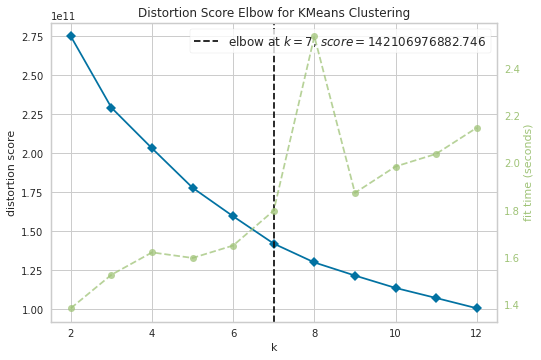

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model,k = 12)
visualizer.fit(input_df)
visualizer.show()

### searching best n_clusters (silhouette score)

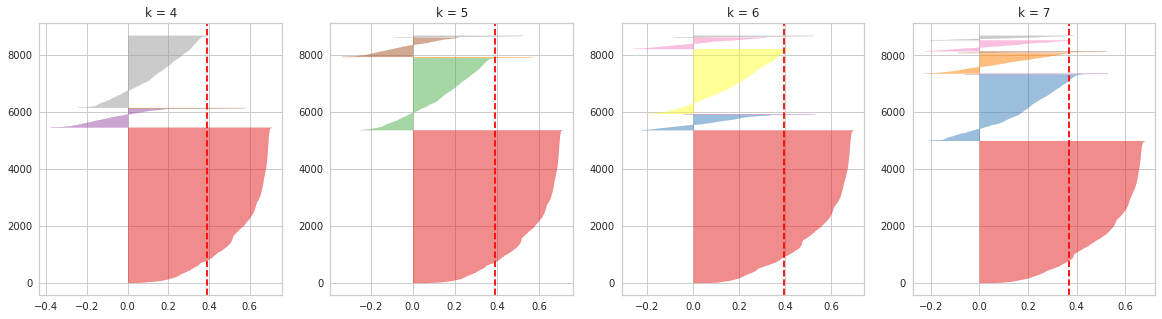

In [87]:
fig,ax = plt.subplots(1,4,figsize = (20,5))
col = 0
for k in [4,5,6,7]:
    model = KMeans(n_clusters = k, random_state = 42)
    visualizer = SilhouetteVisualizer(model, ax = ax[col])
    visualizer.fit(input_df)
    ax[col].set_title(f'k = {k}')
    col += 1


### KMeans Clustering

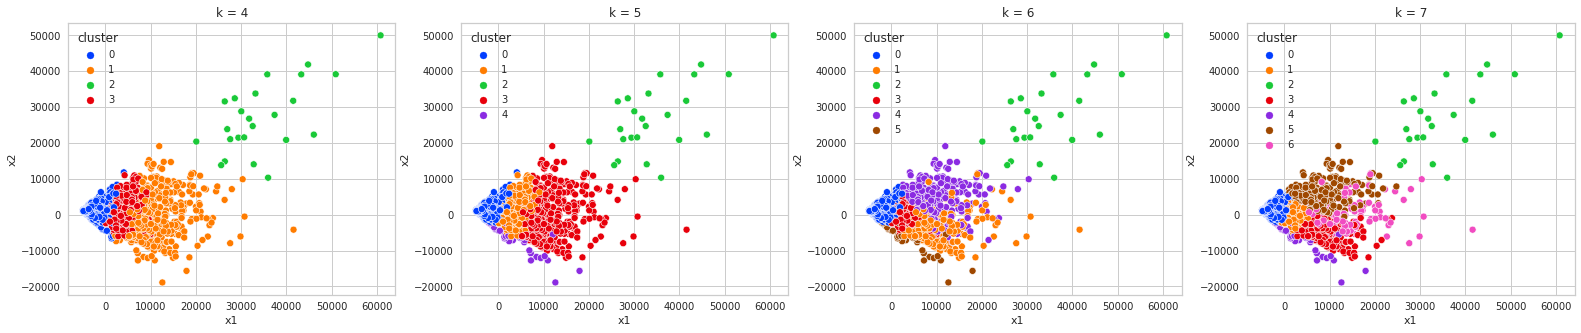

In [88]:
fig_init_1,ax = plt.subplots(1,4,figsize = (27,5))
col = 0

for k in [4,5,6,7]:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(input_df)
    clusters = model.predict(input_df)
    pca = PCA(n_components = 2,random_state = 42)
    pca_df = pd.DataFrame(pca.fit_transform(input_df),columns = ['x1','x2'])
    pca_df['cluster'] = clusters
    sns.scatterplot(data = pca_df, x= 'x1', y = 'x2',hue = 'cluster',palette = 'bright', ax = ax[col])
    ax[col].set_title(f'k = {k}')
    col += 1


### searching best epsilon

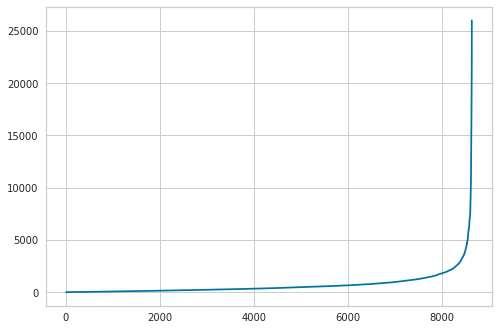

In [89]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(input_df)
distances, indices = nbrs.kneighbors(input_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### DBSCAN clustering

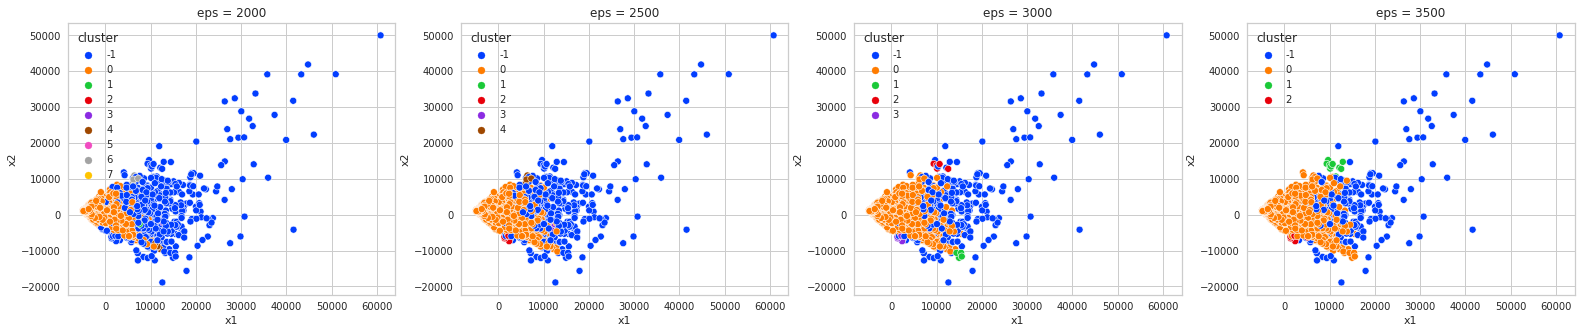

In [90]:
fig_init_2,ax = plt.subplots(1,4,figsize = (27,5))
col = 0

for eps in [2000,2500,3000,3500]:
    model = DBSCAN(eps = eps, min_samples = 5)
    model.fit(input_df)
    pca = PCA(n_components = 2,random_state = 42)
    pca_df = pd.DataFrame(pca.fit_transform(input_df),columns = ['x1','x2'])
    pca_df['cluster'] = model.labels_
    sns.scatterplot(data = pca_df, x= 'x1', y = 'x2',hue = 'cluster',palette = 'bright', ax = ax[col])
    ax[col].set_title(f'eps = {eps}')
    col += 1

### Gaussian Mixture Clustering

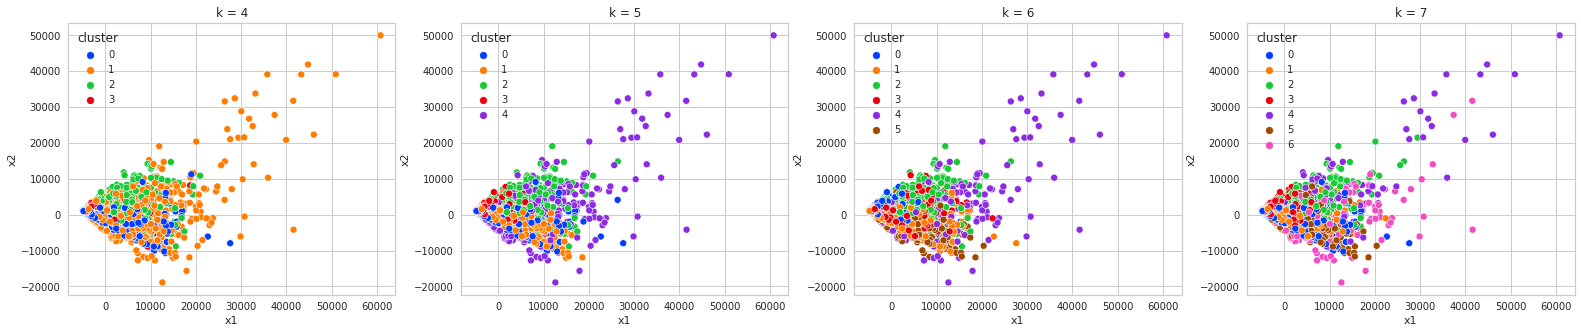

In [91]:
fig_init_3,ax = plt.subplots(1,4,figsize = (27,5))
col = 0
bics = []
aics = []
for k in [4,5,6,7]:
    warnings.filterwarnings('ignore')
    model = GaussianMixture(n_components=k, random_state=42)
    model.fit(input_df)
    clusters = model.predict(input_df)
    pca = PCA(n_components = 2,random_state = 42)
    pca_df = pd.DataFrame(pca.fit_transform(input_df),columns = ['x1','x2'])
    pca_df['cluster'] = clusters
    sns.scatterplot(data = pca_df, x= 'x1', y = 'x2',hue = 'cluster',palette = 'bright', ax = ax[col])
    ax[col].set_title(f'k = {k}')
    col += 1
    bics.append(model.bic(input_df))
    aics.append(model.aic(input_df))

### Gaussian Mixture Evaluation

In [92]:
evals = pd.DataFrame(bics, columns = ['Bayesian Information'],index = [4,5,6,7])
evals['Akaike Informatio'] = aics
evals

Bayesian Information  Akaike Informatio
4         667106.179511      662281.675968
5         551444.345576      545411.950224
6         572861.483355      565621.196193
7         524072.189127      515624.010156

# Model on Engineered Data

### searching best n_clusters (Elbow Method)

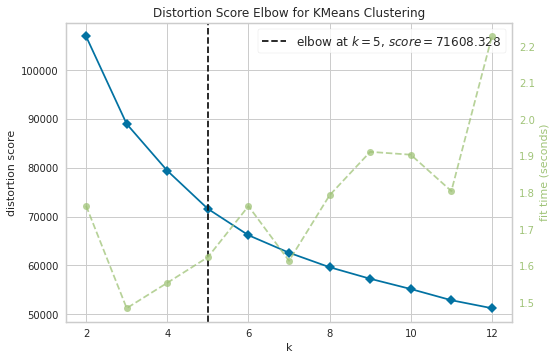

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [93]:
model = KMeans(random_state = 42)
visualizer = KElbowVisualizer(model,k = 12)
visualizer.fit(input_df_2)
visualizer.show()

### searching best n_clusters (Silhouette Score)

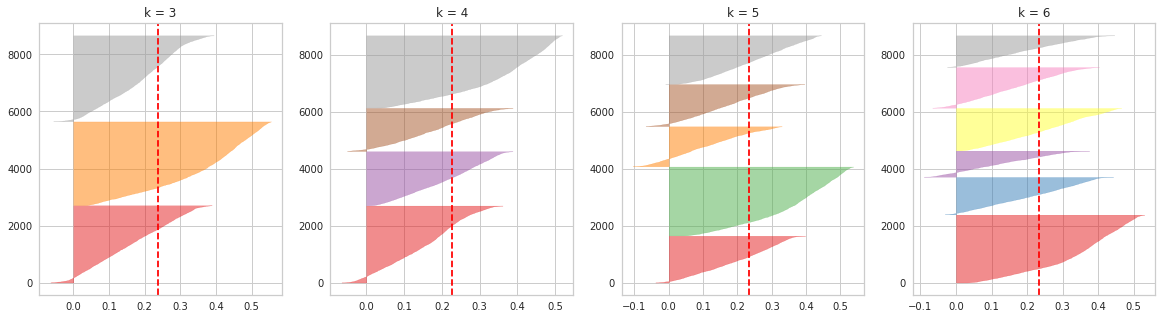

In [94]:
fig,ax = plt.subplots(1,4,figsize = (20,5))
col = 0
for k in [3,4,5,6]:
    model = KMeans(n_clusters = k, random_state = 42)
    visualizer = SilhouetteVisualizer(model, ax = ax[col])
    visualizer.fit(input_df_2)
    ax[col].set_title(f'k = {k}')
    col += 1


### KMeans Clustering

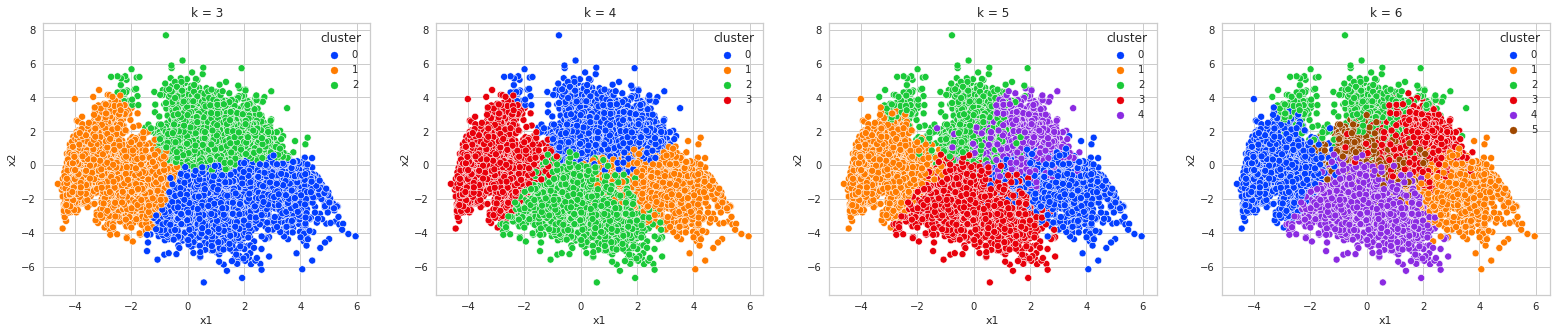

In [95]:
fig_eng_1,ax = plt.subplots(1,4,figsize = (27,5))
col = 0

for k in [3,4,5,6]:
    model = KMeans(n_clusters = k, random_state = 42)
    model.fit(input_df_2)
    clusters = model.predict(input_df_2)
    pca = PCA(n_components = 2,random_state = 42)
    pca_df = pd.DataFrame(pca.fit_transform(input_df_2),columns = ['x1','x2'])
    pca_df['cluster'] = clusters
    sns.scatterplot(data = pca_df, x= 'x1', y = 'x2',hue = 'cluster',palette = 'bright', ax = ax[col])
    ax[col].set_title(f'k = {k}')
    col += 1


### searching best epsilon

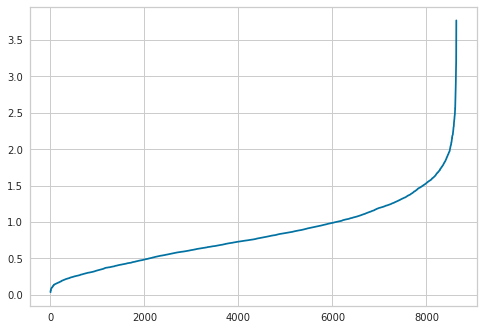

In [96]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(input_df_2)
distances, indices = nbrs.kneighbors(input_df_2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

### DBSCAN Clustering

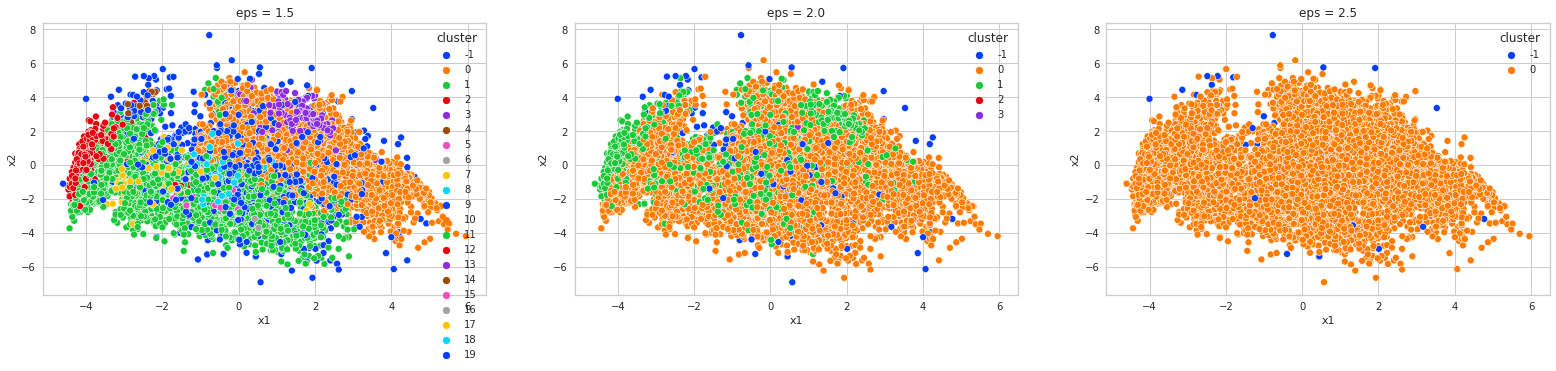

In [97]:
fig_eng_2,ax = plt.subplots(1,3,figsize = (27,5))
col = 0

for eps in [1.5,2.,2.5]:
    model = DBSCAN(eps = eps, min_samples = 5)
    model.fit(input_df_2)
    pca = PCA(n_components = 2,random_state = 42)
    pca_df = pd.DataFrame(pca.fit_transform(input_df_2),columns = ['x1','x2'])
    pca_df['cluster'] = model.labels_
    sns.scatterplot(data = pca_df, x= 'x1', y = 'x2',hue = 'cluster',palette = 'bright', ax = ax[col])
    ax[col].set_title(f'eps = {eps}')
    col += 1

### Gaussian Mixture Clustering

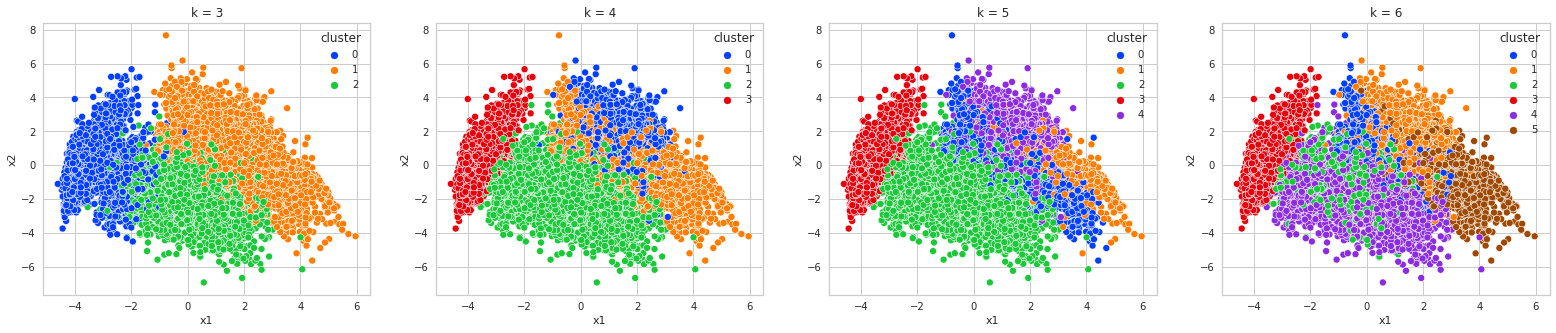

In [98]:
fig_eng_3,ax = plt.subplots(1,4,figsize = (27,5))
col = 0
bics = []
aics = []
for k in [3,4,5,6]:
    warnings.filterwarnings('ignore')
    model = GaussianMixture(n_components=k, random_state=42)
    model.fit(input_df_2)
    clusters = model.predict(input_df_2)
    pca = PCA(n_components = 2,random_state = 42)
    pca_df = pd.DataFrame(pca.fit_transform(input_df_2),columns = ['x1','x2'])
    pca_df['cluster'] = clusters
    sns.scatterplot(data = pca_df, x= 'x1', y = 'x2',hue = 'cluster',palette = 'bright', ax = ax[col])
    ax[col].set_title(f'k = {k}')
    col += 1
    bics.append(model.bic(input_df_2))
    aics.append(model.aic(input_df_2))

In [99]:
evals2 = pd.DataFrame(bics, columns = ['Bayesian Information'],index = [4,5,6,7])
evals2['Akaike Informatio'] = aics
evals2

Bayesian Information  Akaike Informatio
4         -36528.449417      -40145.061150
5        -157803.267176     -162627.770719
6        -180942.076962     -186974.472314
7        -225557.655186     -232797.942347

# Results

what we have done so far were trying out 3 clustering models namely KMeans, DBSCAN, and Gaussian Mixture.

below the comparison between three models using original dataset

### KMeans

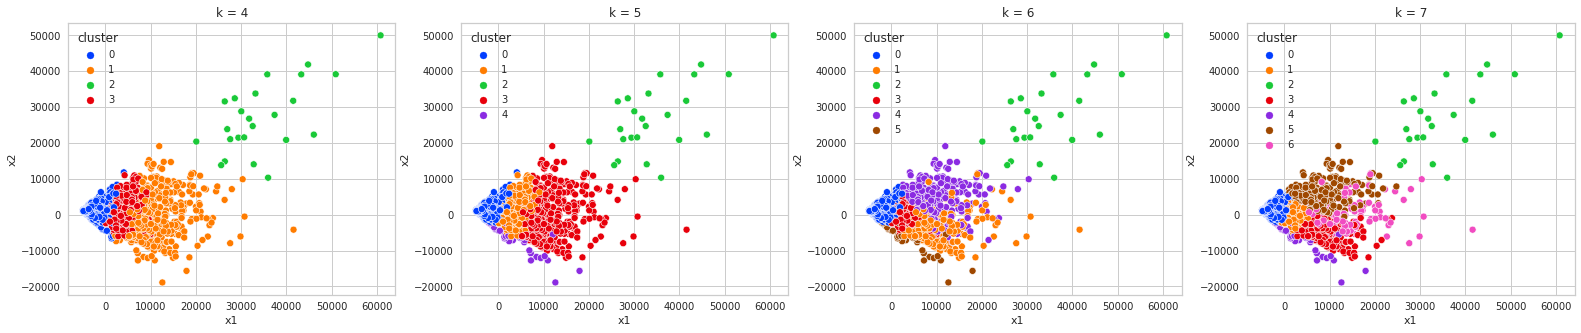

In [101]:
fig_init_1

best n_clusters found using elbow method is 7. 

however, it seems that when k = 7, clusters are too close to each other and kind of mixed

it is so much better to see when k = 4 or k = 5

clusters are clearly divided and not too close to eachother. hence easier to interpret

### DBSCAN

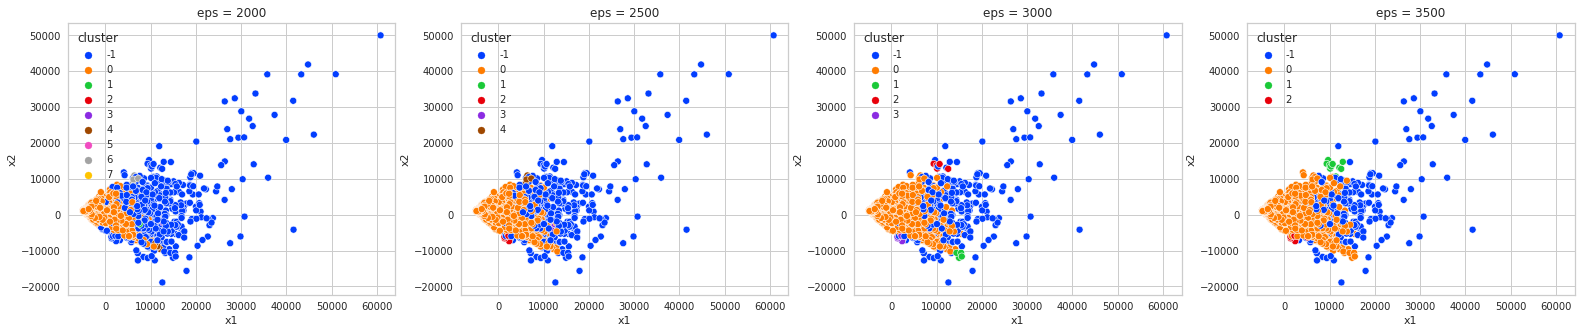

In [102]:
fig_init_2

meanwhile, DBSCAN is kind of having hard time clustering the data. for example when epsilon = 2000, there should be 9 clusters. from the scatters, it seems that it only has 3 clusters

### Gaussian Mixture

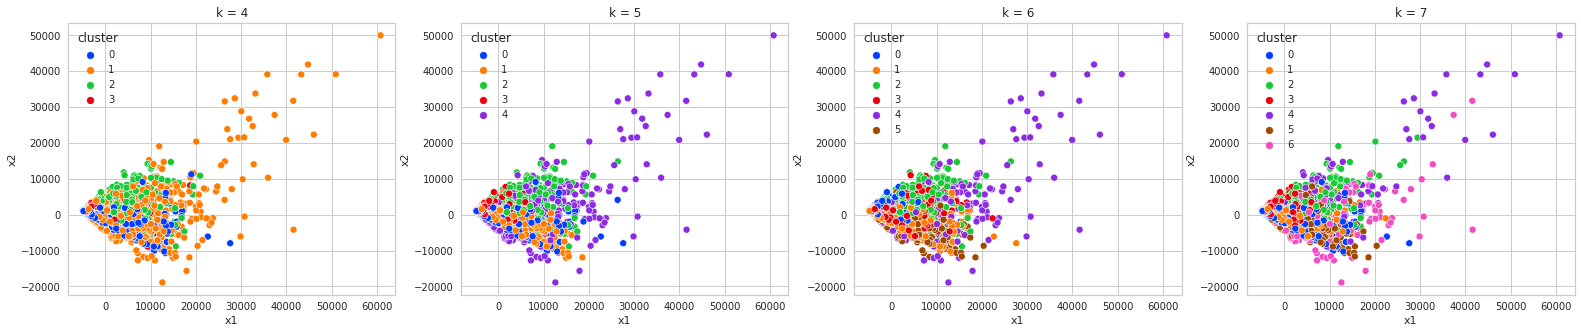

In [103]:
fig_init_3

GM (Gaussian Mixture) seems to be doing almost same as KMeans. 

though there is one difference. 

we were able to see the division of clusters when k = 4 or 5. but as we can see from GM result. all clusters seem too scattered

from the initial models. we can clearly state that KMeans is doing better job at clustering this data.

however, it is too quick to judge which one is better. 

that is because the data was not in its best form.

therfore we need to transform and scale the data and these are the results of each models afterwards

### KMeans

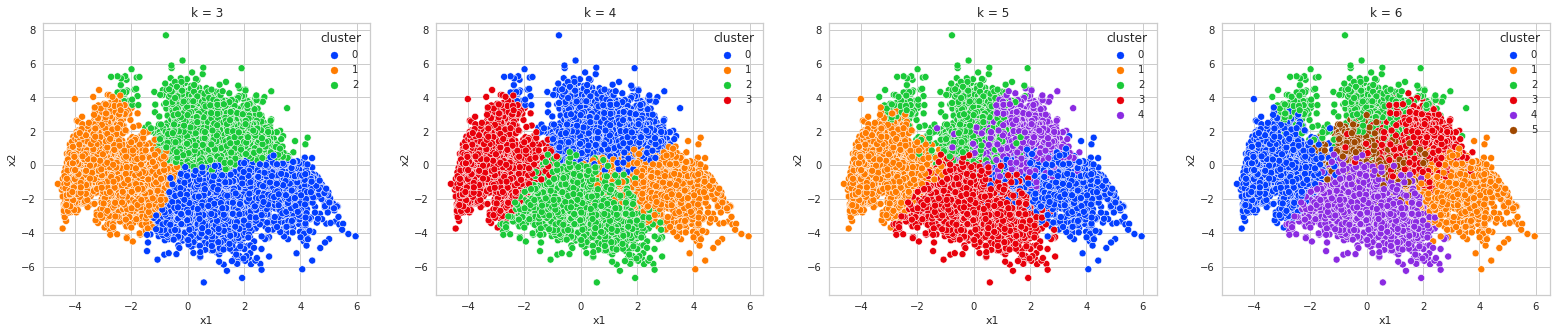

In [104]:
fig_eng_1

### DBSCAN

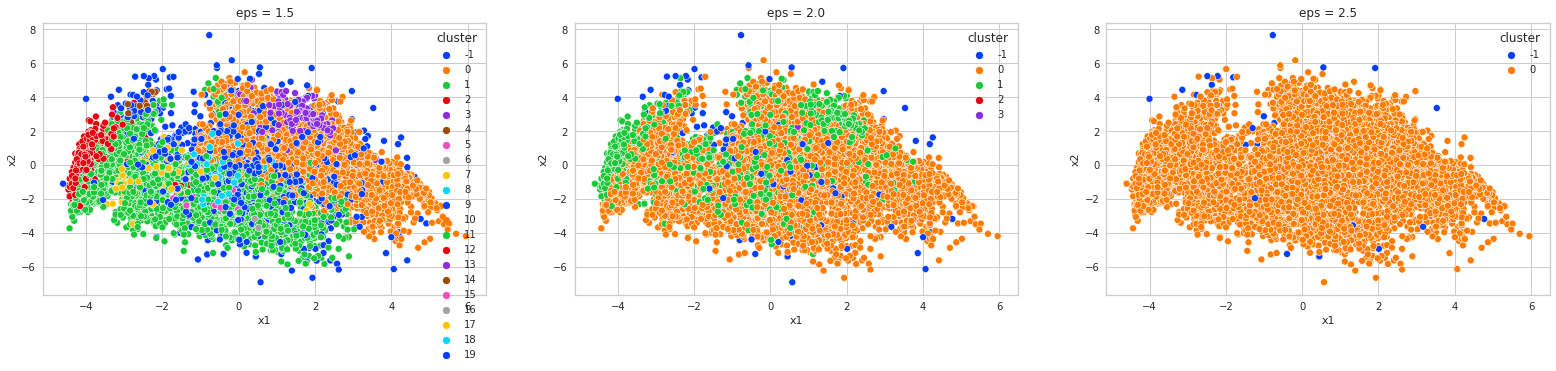

In [105]:
fig_eng_2

### Gaussian Mixture

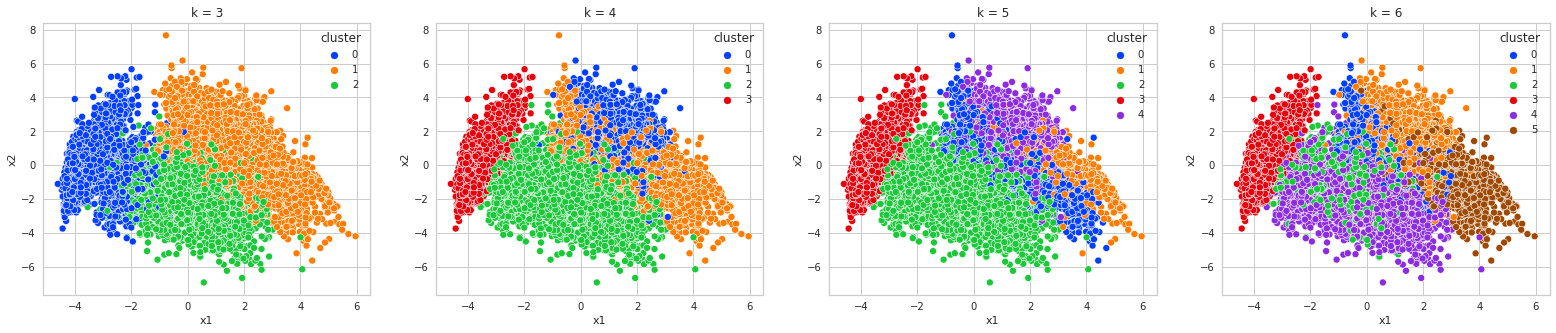

In [106]:
fig_eng_3

the optimal k for KMeans and Gaussian Mixture was 7 according to Elbow Method and the smallest GM Bayesian and Akaike Information.

using the new transformed data, the optimal k for KMeans and Gaussian Mixture was 5 according to Elbow Method and 4 according to the smallest GM Bayesian and Akaike Information.

still for the best model overall, i would say KMeans.
however, we are only selecting one worthy model. 

i would like to compare KMeans using K = 3 and GM using k = 3. the reason is that only both scatter plots show clear division between clusters.

KMeans model clustered the data beautifully. but there is a little problem where visually certain points from cluster 1 should be closer to cluster 2.

whereas in GM model. the divisions between clusters are not as clear as KMeans but the little problem explained earlier is actually not present

based on the comparison. we are going to take KMeans with Engineered Features where the k is equal to 3. this model is better because i would rather have small points from one cluster clustered incorrectly visually than each cluster looks like exchanging points to each other. 

# Model Inference

In [110]:
model = KMeans(n_clusters = k, random_state = 42)
model.fit(input_df_2)
obs  = input_df_2.sample(1,random_state = 42)
pred = model.predict(obs)[0]
print(f'credit card holder is part of cluster {pred}')

credit card holder is part of cluster 3
